# Basic Classification

This part demonstrates how to perform basic classification with sk-learn.

- naive bayes
- decision trees

In [1]:
# code by python 3.5
# code about native bayes
# native bayes contains 3 models: MultinomialNB,BernoulliNB and GaussianNB, we take GaussianNB as an example
import numpy
from sklearn.naive_bayes import GaussianNB

def test_gaussian_nb():
    #height,weight,size of foot
    X = numpy.array([
        [6, 180, 12],
        [5.92, 190, 11],
        [5.58, 170, 12],
        [5.92, 165, 10],
        [5, 100, 6],
        [5.5, 150, 8],
        [5.42, 130, 7],
        [5.75, 150, 9],
    ])

    #sex 1 is male and 2 is female
    Y = numpy.array([1, 1, 1, 1, 0, 0, 0, 0])

    gnb = GaussianNB()
    gnb.fit(X, Y)

    test = numpy.array([6, 130, 8]).reshape(1, -1)
    result = gnb.predict(test)
    print(result)
    print("0 is female, 1 is male")


if __name__ == '__main__':
    test_gaussian_nb()


[0]
0 is female, 1 is male


[[ 1.4  0.2]
 [ 1.4  0.2]
 [ 1.3  0.2]
 [ 1.5  0.2]
 [ 1.4  0.2]
 [ 1.7  0.4]
 [ 1.4  0.3]
 [ 1.5  0.2]
 [ 1.4  0.2]
 [ 1.5  0.1]
 [ 1.5  0.2]
 [ 1.6  0.2]
 [ 1.4  0.1]
 [ 1.1  0.1]
 [ 1.2  0.2]
 [ 1.5  0.4]
 [ 1.3  0.4]
 [ 1.4  0.3]
 [ 1.7  0.3]
 [ 1.5  0.3]
 [ 1.7  0.2]
 [ 1.5  0.4]
 [ 1.   0.2]
 [ 1.7  0.5]
 [ 1.9  0.2]
 [ 1.6  0.2]
 [ 1.6  0.4]
 [ 1.5  0.2]
 [ 1.4  0.2]
 [ 1.6  0.2]
 [ 1.6  0.2]
 [ 1.5  0.4]
 [ 1.5  0.1]
 [ 1.4  0.2]
 [ 1.5  0.1]
 [ 1.2  0.2]
 [ 1.3  0.2]
 [ 1.5  0.1]
 [ 1.3  0.2]
 [ 1.5  0.2]
 [ 1.3  0.3]
 [ 1.3  0.3]
 [ 1.3  0.2]
 [ 1.6  0.6]
 [ 1.9  0.4]
 [ 1.4  0.3]
 [ 1.6  0.2]
 [ 1.4  0.2]
 [ 1.5  0.2]
 [ 1.4  0.2]
 [ 4.7  1.4]
 [ 4.5  1.5]
 [ 4.9  1.5]
 [ 4.   1.3]
 [ 4.6  1.5]
 [ 4.5  1.3]
 [ 4.7  1.6]
 [ 3.3  1. ]
 [ 4.6  1.3]
 [ 3.9  1.4]
 [ 3.5  1. ]
 [ 4.2  1.5]
 [ 4.   1. ]
 [ 4.7  1.4]
 [ 3.6  1.3]
 [ 4.4  1.4]
 [ 4.5  1.5]
 [ 4.1  1. ]
 [ 4.5  1.5]
 [ 3.9  1.1]
 [ 4.8  1.8]
 [ 4.   1.3]
 [ 4.9  1.5]
 [ 4.7  1.2]
 [ 4.3  1.3]
 [ 4.4  1.4]
 [ 4.8  1.4]

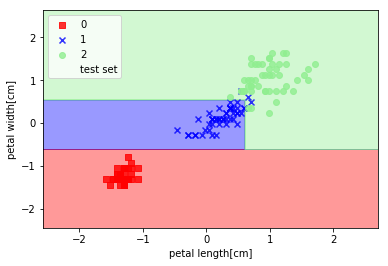

In [6]:
from sklearn import datasets
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# to draw the pic
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # set pic params
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

   
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
  
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
   
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidths=1, marker='o', s=55, label='test set')


# insert data
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
print(X)
y = iris.target
# divide test data set and train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(y)
sc = StandardScaler()
sc.fit(X_train)  
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train_std, y_train)
# forest=RandomForestClassifier(criterion='entropy',n_estimators=10,n_jobs=2,random_state=1)
# forest.fit(X_train_std,y_train)
y_pred = tree.predict(X_test_std)
print('Accuracy:%.2f' % accuracy_score(y_test, y_pred))  

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length[cm]')
plt.ylabel('petal width[cm]')
plt.legend(loc='upper left')
plt.show()



In [3]:
# Excercice: Write functions to calculate Gain Split, GainRatio and GINI index, 
import pandas as pd
from sklearn import datasets
import numpy as np


debug = False

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

def calculate_gain_split_for_discrect(X, y):
    """
    计算离散值的信息增益
    :param X:
    :param y:
    :return:
    """
    X = X.reshape(-1,1)
    targets = pd.unique(y)
    info_d = calculate_expect_info(y)
    gain_list = []
    total_num = y.size
    if debug:
        print('info D:', info_d)
        print('begin to calculate info_i')
    for i in range(X.shape[1]):
        data_i = X[:,i]
        type_i = pd.unique(data_i)
        Info_i = 0
        for type in type_i:
            data_type = data_i[data_i == type]
            type_i_total = data_type.size
            if debug:
                print('type_i:', type_i_total, type)
            info_i = 0
            for target in targets:
                type_i_yes = y[y == target].size
                if debug:
                    print('target_num:', target, type_i_yes)
                info_i +=  - (type_i_yes / type_i_total) * np.log2((type_i_yes / type_i_total))
                if debug:
                    print('info_i:', info_i)
            Info_i += (type_i_total / total_num) * info_i
        gain_i = info_d - Info_i
        gain_list.append(gain_i)
    return gain_list

def calculate_gain_ratio():

    pass


def calculate_expect_info(y):
    """
    计算期望信息
    :param y:
    :return:
    """
    targets = pd.unique(y)
    info_d = 0
    total_num = y.size
    for target in targets:
        target_num = y[y == target].size
        if debug:
            print('target_num:', target, target_num)
        info_d += -(target_num / total_num) * np.log2((target_num / total_num))
    return info_d

def calculate_gain_split_for_continue(X, y):
    """
    计算连续值的信息增益
    :param X:
    :param y:
    :return: X中每个属性信息增益
    """

    # data = np.c_[X, y]
    expect_info_list = []
    for i in range(X.shape[1]):
        expect_info_list.append([])
        data = X[X[:, i].argsort()]
        for j in range(data.shape[0] - 1):
            split_line = (data[j, i] + data[j + 1, i]) / 2
            discrect_data_x = data[:, i] >= split_line
            expect_info = calculate_expect_info(discrect_data_x)
            if debug:
                print(expect_info, split_line)
            expect_info_list[i].append((expect_info, split_line))
    best_gain = []
    for i in range(len(expect_info_list)):
        best_split = min(expect_info_list[i], key= lambda x: x[0])[1]
        discrect_data_x = X[:, i] >= best_split
        gain = calculate_gain_split_for_discrect(discrect_data_x, y)[0]
        best_gain.append(gain)
    print("X属性的最佳信息增益:", best_gain)
    return best_gain

print(X.shape, y.shape)
calculate_gain_split_for_continue(X, y)



(150, 2) (150,)
X属性的最佳信息增益: [5.6535063598084436, 0.0]


[5.6535063598084436, 0.0]